# *Sale Price Prediction*

Sales forecasting is a prevalent trend that businesses are currently focusing on, as it helps organisations establish their future objectives and the strategies and processes needed to attain them.

**Dataset Description:**

The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

## *Import Libraries*

In [67]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## *Load Data*

In [36]:
# load data
sale_data = pd.read_csv("car_prices.csv")

## *Data Understanding*

In [37]:
# get first 3 rows
sale_data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [38]:
# get last 3 rows
sale_data.tail(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [39]:
# get shape of data
sale_data.shape

(558837, 16)

In [40]:
# get data information
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [41]:
# check for description
sale_data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


The mean odometer range is 68320 while max is 999999 indicating the outliers presence. The mean price of selling the vehicle is 13611.36 USD dollars.

In [42]:
# check the missing value
sale_data.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


Many missing values are present.

In [43]:
# check for duplicates
sale_data.duplicated().sum()

0

In [44]:
# check unique value in transmission
sale_data['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [45]:
# check state of car
sale_data['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

## *Data Cleaning*

In [46]:
# remove unwanted columns
sale_data = sale_data.drop(['year', 'saledate', 'vin', 'seller'], axis=1)

In [47]:
# verify step
sale_data.head(3)

,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0


In [48]:
# handle missing value - by dropping it
sale_data = sale_data.dropna()

The reason to drop this missing values is because the dataset has many value, so instead of filling it and adding noise. It is better to remove it.

In [49]:
# check new shape of data
sale_data.shape

(472325, 12)

## *Data Analysis*

### *1. Histogram Plot - Selling Price*

In [51]:
# create a function for making histogram for selling price
def price_plot(data):
  """
  This function plots a histogram for checking the distribution of selling price for various car range for the given dataset.

  Parameters: data - dataframe with sellingprice column

  Returns: created histogram plot
  """

  # define the moderate figure size to show the graph
  plot.figure(figsize=(6,4))

  # plot a histogram
  plot.hist(data['sellingprice'], bins=28, color='#697565', edgecolor='#1E201E')

  # define a good title
  plot.title('Vehicle Selling Price Distribution')

  # define sutiable lables
  plot.xlabel('Selling Price')
  plot.ylabel('Selling Price Car Range')

  # show the graph
  plot.show()

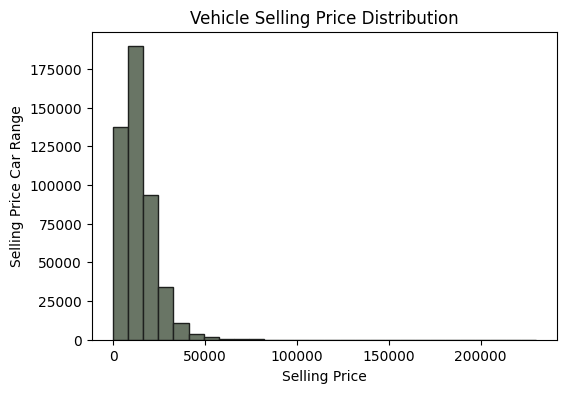

In [52]:
# make the plot
price_plot(sale_data)

The plot shows that the vehicle selling price distribution is right skwed, with many vehicle price between 0 to 50,000. It also suggest that most of second vehicles are affordable and only few vehicles are high priced.

### *2. Line Plot - Vehicle Body vs MMR*

In [61]:
# create a function for making line plot
def carbody_mmr_plot(data):
  """
  This function plots a line plot for checking the mean mmr for each body type for better understanding.

  Parameters: data - dataframe with body and mmr column

  Returns: created line plot
  """

  # calculate the mean mmr for each body type for better understanding
  mean_mmr = data.groupby('body')['mmr'].mean()

  # define the moderate figure size to show the graph
  plot.figure(figsize=(12,8))

  # make line plot
  plot.plot(mean_mmr.index, mean_mmr.values, marker='s', color='#697565', linestyle='-', linewidth=0.7, markersize=4)

  # define a good title
  plot.title('Vehicle Body vs MMR')

  # define sutiable lables
  plot.xlabel('Body Type')
  plot.ylabel('Mean MMR')

  # rotate x axis values to 90 degree
  plot.xticks(rotation=90)

  # show the graph
  plot.show()

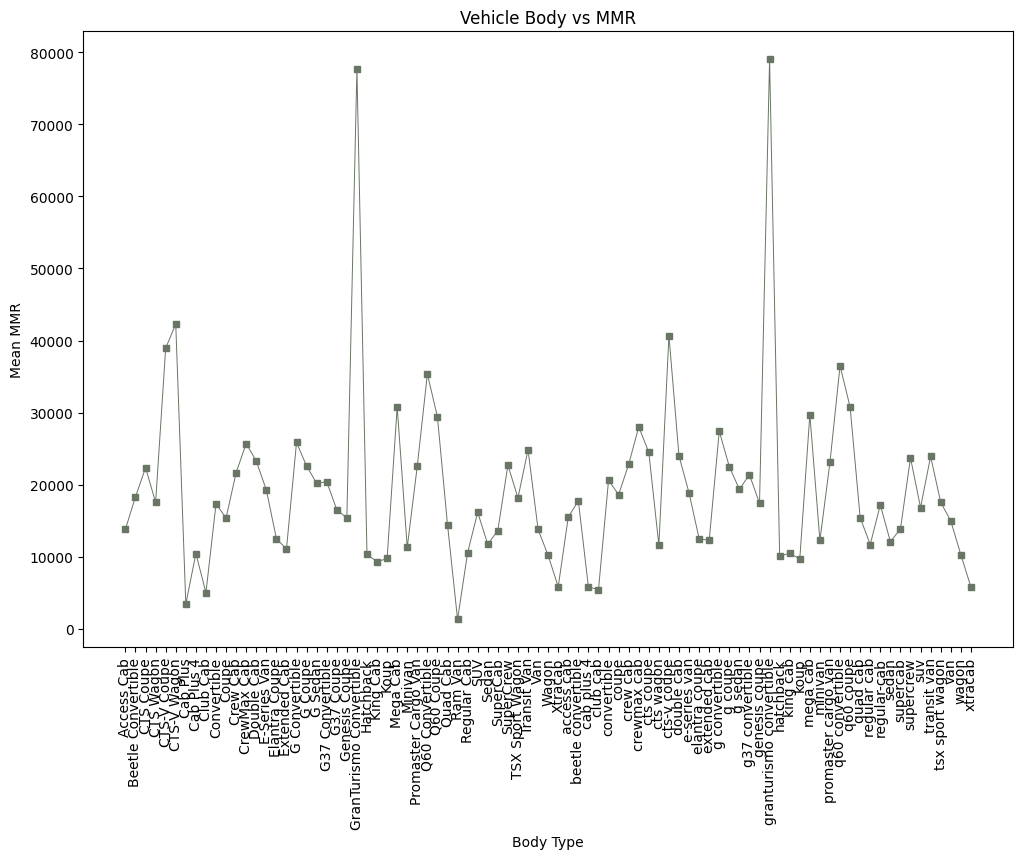

In [62]:
# make the plot
carbody_mmr_plot(sale_data)

The plot revels that vehicle mmr price highly depends on the body type. Like some body types such as 'GranTurismo Convertible' and 'CTC Coupe' hae high mean mmr while 'Regular Cab' and 'Cab Plus' has low mean mmr. It also sugesst that body has the high influence when deciding vehicle market price.

### *3. Corrleation Plot - Heatmap*

#### *Label Encoding*

It helps in converting categorical column into numerical type column.

In [68]:
# initialise label encode all the categories value
le = LabelEncoder()

In [69]:
# apply label encoding for all object value
sale_data['make'] = le.fit_transform(sale_data['make'])
sale_data['model'] = le.fit_transform(sale_data['model'])
sale_data['trim'] = le.fit_transform(sale_data['trim'])
sale_data['body'] = le.fit_transform(sale_data['body'])
sale_data['transmission'] = le.fit_transform(sale_data['transmission'])
sale_data['state'] = le.fit_transform(sale_data['state'])
sale_data['color'] = le.fit_transform(sale_data['color'])
sale_data['interior'] = le.fit_transform(sale_data['interior'])

#### *Plot HeatMap*

In [72]:
# calculate correlation
corr = sale_data.corr()

In [73]:
# create a function for heatmap
def corr_heatmap(corr):
  """
  This function plots the correlation heatmap
  """

  # define a custom cmap
  cmap_cust = sns.light_palette("#697565", as_cmap=True)

  # define the moderate figure size
  plot.figure(figsize=(10,6))

  # make a good heatmap
  sns.heatmap(corr, cmap=cmap_cust, annot=True)

  # define a good title
  plot.title('Correlation Heatmap for Vehicle Sale Prediction')

  # show the graph
  plot.show()

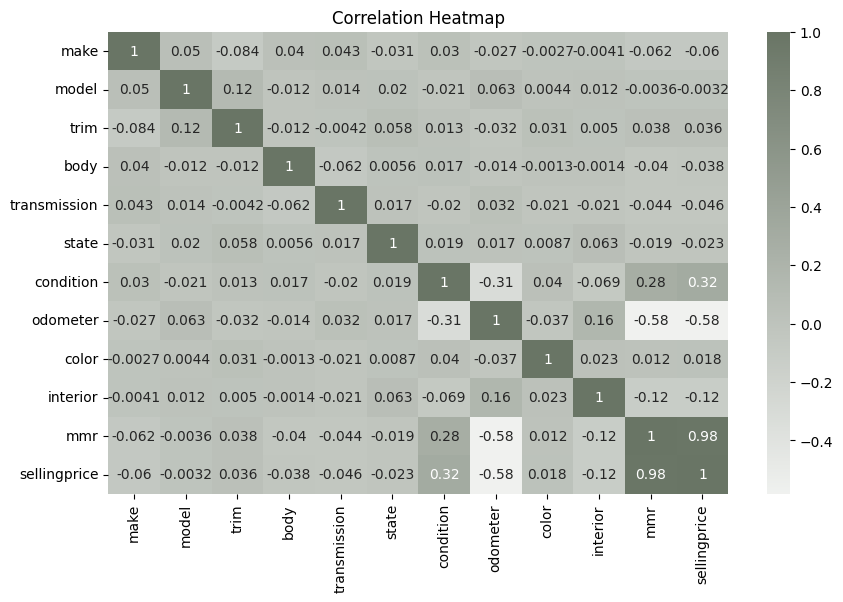

In [74]:
# make the plot
corr_heatmap(corr)

The heatmap shows that mmr and selling price have a strong positive correlation, indicating high mmr means high selling price and vice versa. Condition of the vehicle is also moderately positively correlated with selling price, telling good condition of vehicles that sell for more price.

While, odometer has the moderate negative correlation with selling price defining, the more the vehicle has travelled it sells at less price. Other columns have weak relations, stating the limitation of prediction impact on selling price.


## *Final Overview*


The analysis state that body of vehicle has high influence on mmr price, with telling high mmr means high selling price. Also, condition of the body decides the price and it was seen that there are few outlier present that could impact the build model performance.